
# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [4]:
# excluir valores nulos sem sentido
df = df.dropna()
# excluir colunas desnecessárias. 
df = df.drop(['Unnamed: 0','data_ref','id_cliente'], axis=1)


In [5]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [6]:
# 1)
df_treino, df_teste = train_test_split(df, test_size=0.25, random_state=100)

In [7]:
# 2)
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_teste)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    
    reg_summary = reg.summary()
    print(reg_summary)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.76e-220
Time:                        20:19:01   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.76e-220
Time:                        20:19:07   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.76e-220
Time:                        20:19:13   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [8]:
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_teste)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    
    print(f'R² = {reg.rsquared} Adj. R² = {reg.rsquared_adj} Alpha = {i} ')

R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.001 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.005 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.01 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.05 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.1 


Observamos que todos os modelos ficaram iguais, variando pouco o R² , R² ajustado e o AIC.

In [9]:
# 3)
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_teste)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = i)
    
    reg_summary = reg.summary()
    print(reg_summary)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.76e-220
Time:                        20:19:51   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.76e-220
Time:                        20:19:56   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.76e-220
Time:                        20:20:02   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [10]:
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_teste)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = i)
    
    print(f'R² = {reg.rsquared} /// Adj. R² = {reg.rsquared_adj} Alpha = {i} ')

R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.001 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.005 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.01 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.05 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.1 


O resultado melhor foi com o Alpha = 0 e Alpha = 0,001

In [18]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [19]:
# 4)

#X_step = df_teste.drop('renda', axis = 1)
X_step = pd.get_dummies(df_teste, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], 
                        drop_first=True)

y_step = df_teste.renda
X_step = X_step.drop(columns=['renda'])
# verificando se a renda saiu dos dados
X_step.info()



<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 3740 to 10639
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     3107 non-null   int64  
 1   idade                          3107 non-null   int64  
 2   tempo_emprego                  3107 non-null   float64
 3   qt_pessoas_residencia          3107 non-null   float64
 4   sexo_M                         3107 non-null   bool   
 5   posse_de_veiculo_True          3107 non-null   bool   
 6   posse_de_imovel_True           3107 non-null   bool   
 7   tipo_renda_Bolsista            3107 non-null   bool   
 8   tipo_renda_Empresário          3107 non-null   bool   
 9   tipo_renda_Pensionista         3107 non-null   bool   
 10  tipo_renda_Servidor público    3107 non-null   bool   
 11  educacao_Pós graduação         3107 non-null   bool   
 12  educacao_Secundário            3107 non-null   bo

In [20]:
# devemos converter os dados para numérico
X_step = X_step.apply(pd.to_numeric, errors='coerce')

X_step = X_step.astype(int)

In [21]:
selected_features = stepwise_selection(X_step, y_step)

print("Selected features:", selected_features)

Add  tempo_emprego                  with p-value 4.16926e-124
#############
['tempo_emprego']
Add  sexo_M                         with p-value 1.83211e-105
#############
['tempo_emprego', 'sexo_M']
Add  educacao_Superior completo     with p-value 3.12132e-07
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo']
Add  tipo_renda_Empresário          with p-value 0.00121816
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário']
Add  qt_pessoas_residencia          with p-value 0.00105194
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário', 'qt_pessoas_residencia']
Add  idade                          with p-value 5.09329e-05
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário', 'qt_pessoas_residencia', 'idade']
Add  posse_de_imovel_True           with p-value 0.029802
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_re

Entendo que o melhor modelo seria utilizando as variaveis:

['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'tipo_renda_Empresário', 'qt_pessoas_residencia', 'idade', 'posse_de_imovel_True']

In [22]:
reg_stepwise = sm.OLS(y_step, sm.add_constant(
pd.DataFrame(X_step[['tempo_emprego', 
                     'sexo_M', 
                     'educacao_Superior completo', 
                     'tipo_renda_Empresário', 
                     'qt_pessoas_residencia', 
                     'idade', 
                     'posse_de_imovel_True']]))).fit()
    
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     189.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.77e-234
Time:                        20:38:36   Log-Likelihood:                -31742.
No. Observations:                3107   AIC:                         6.350e+04
Df Residuals:                    3099   BIC:                         6.355e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -4331.5970    739.700     -5.856      0.000   -5781.949   -2881.245
tempo_emprego                519.3435     19.032     27.288      0.000     482.028     556.659
sexo_M                      5822.2392    253.440     22.973      0.000    5325.312    6319.167
educacao_Superior completo  1292.1858    246.435      5.244      0.000     808.993    1775.378
tipo_renda_Empresário        955.2697    267.048      3.577      0.000     431.660    1478.879
qt_pessoas_residencia        546.5038    134.163      4.073      0.000     283.447     809.561
idade                         53.7914     14.135      3.806      0.000      26.077      81.506
posse_de_imovel_True         553.2232    254.506      2.174      0.030      54.206    1052.240
==============================================================================
Omnibus:                     3027.179   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           240154.238
Skew:                           4.515   Prob(JB):                         0.00
Kurtosis:                      45.113   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#5) Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?


Entendo que o resultado de todos os modelos de regressão foram similares, tanto analisando R²-ajustado quanto o AIC.
Quando usamos o stepwise garantimos que analisamos o maior número de combinação de variáveis possível. Acredito que usaria ele para começar e depois tentaria fazer uma análise elástica com as variáveis definidas pelo modelo.


In [23]:
#6) Partindo dos modelos que você ajustou, tente melhorar o  𝑅2 
# na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + idade + tempo_emprego + 1'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_teste)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    
    print(f'R² = {reg.rsquared} Adj. R² = {reg.rsquared_adj} Alpha = {i} ')

R² = 0.3537907682461803 Adj. R² = 0.3527488314003986 Alpha = 0 
R² = 0.3537907682461803 Adj. R² = 0.3527488314003986 Alpha = 0.001 
R² = 0.3537907682461803 Adj. R² = 0.3527488314003986 Alpha = 0.005 
R² = 0.3537907682461803 Adj. R² = 0.3527488314003986 Alpha = 0.01 
R² = 0.3537907682461803 Adj. R² = 0.3527488314003986 Alpha = 0.05 
R² = 0.3537907682461803 Adj. R² = 0.3527488314003986 Alpha = 0.1 


In [32]:
#7) Ajuste uma árvore de regressão e veja se consegue um  𝑅2 melhor com ela.

X_tree = pd.get_dummies(df, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], 
                        drop_first=True)

y_tree = df.renda

X_tree = X_tree.drop(columns=['renda'])


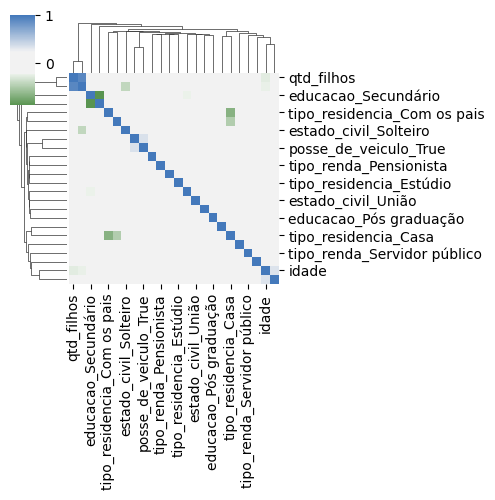

In [34]:
cmap = sns.diverging_palette(h_neg=125
                             , h_pos=250
                             , as_cmap=True
                             , sep = 60
                             , center = 'light')

sns.clustermap(X_tree.corr(), figsize=(5, 5), center = 0, cmap=cmap)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.25, random_state=100)


In [36]:
reg = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, ccp_alpha=0 )

reg.fit(X_train, y_train)

R_sqr1 = reg.score(X_test, y_test)
R_sqr1

0.3549632556980171